<a href="https://colab.research.google.com/github/jaesunkkk/esaa_assignment/blob/main/%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,863 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and d

In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
#글자 오류해결
plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns

1. 데이터 불러들이고 정보 확인하기

In [3]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [4]:
df.shape

(395547, 8)

In [5]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
df.tail(5)

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [7]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [9]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


2. 유의미한 결과 5개 이상 출력하고, 그래프 그리기.

2.(1) 카테고리 별 청원의 수 추출

In [10]:
#카테고리별 올라온 청원의 수
category=pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns=['category','counts']
category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


Text(0.5, 1.0, 'category_petition counts bar')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, fl

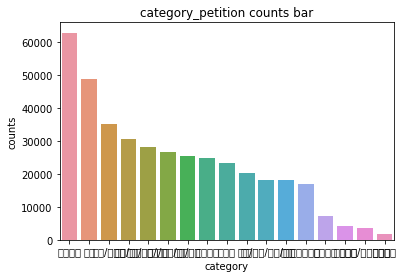

In [11]:
#글자깨짐
bycategory=plt.subplots()
bycategorycounts=sns.barplot(x='category',y='counts',data=category)
bycategorycounts.set_title("category_petition counts bar")

In [12]:
#글자 오류해결
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

Text(0.5, 1.0, '각 카테고리 별 청원의 수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_

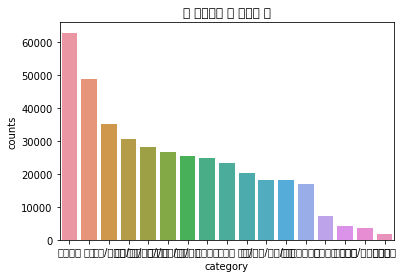

In [13]:
#위의 코드를 실행하였음에도 한글 깨짐을 해결하지 못함
bycategory=plt.subplots()
bycategorycounts=sns.barplot(x='category',y='counts',data=category)
bycategorycounts.set_title("각 카테고리 별 청원의 수")

2.(2) 시기별 청원의 수 추출

In [14]:
df['year']=df['start'].dt.year
df['month']=df['start'].dt.month

2.(2)-1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'counts')

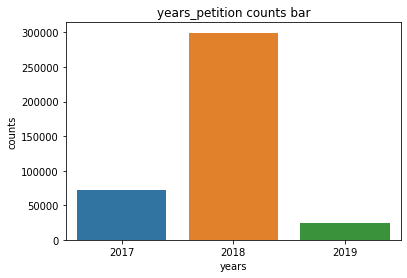

In [15]:
#연도별 청원의 수
ax= plt.subplots()
ax= sns.countplot('year', data=df)
ax.set_title('years_petition counts bar')
ax.set_xlabel('years')
ax.set_ylabel('counts')

2.(2)-2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'counts')

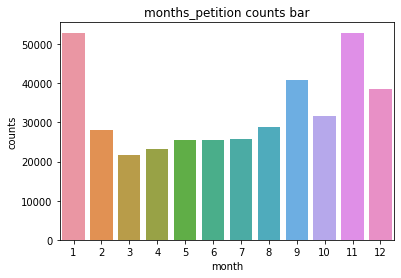

In [16]:
#월별 청원의 수
ax= plt.subplots()
ax= sns.countplot('month', data=df)
ax.set_title('months_petition counts bar')
ax.set_xlabel('month')
ax.set_ylabel('counts')

2.(3)-1 조건에 따른 카테고리 별 청원의 수 데이터 **<답변 대상 청원>**




Text(0, 0.5, 'count')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_

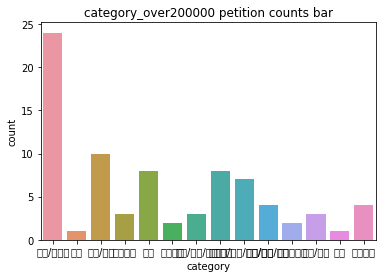

In [17]:
#20만건 이상 투표를 받은 카테고리별 청원의 수-그래프
df_20 = df[df['votes'] > 200000]
df_20['category'].value_counts()
ax = sns.countplot(x = 'category', data = df_20)
ax.set_title("category_over200000 petition counts bar")
ax.set_xlabel('category')
ax.set_ylabel('count')

In [19]:
#20만건 이상 투표를 받은 카테고리별 청원의 수-표
df_20.category.value_counts()
df_20_cat = df_20.category.value_counts()
df_20_category = df_20_cat.to_frame().reset_index()
df_20_category.columns = ['category','count']
df_20_category

,category,count
0,인권/성평등,24
1,안전/환경,10
2,기타,8
3,정치개혁,8
4,문화/예술/체육/언론,7
5,반려동물,4
6,외교/통일/국방,4
7,육아/교육,3
8,교통/건축/국토,3
9,보건복지,3


2.(3)-2 조건에 따른 카테고리 별 청원의 수 데이터 <답변 받은 청원>

In [20]:
df['answer'] = (df['votes'] > 200000) == 1
df['no_answer'] = (df['votes'] < 200000) == 1

In [22]:
df['answer'] = df['answer'].astype('int')
df['no_answer'] = df['no_answer'].astype('int') 

df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()

51

In [23]:
is_answered = df['answered'] == 1
subset_df = df[is_answered]
subset_df

,article_id,start,end,answered,votes,category,title,content,year,month,answer,no_answer,answer_diff
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,2017,9,1,0,0
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,2017,9,1,0,0
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,2017,9,1,0,0
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",2017,11,1,0,0
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",2017,11,1,0,0
47285,49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",2017,11,1,0,0
54896,57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,2017,12,1,0,0
70744,76020,2017-12-28,2018-01-27,1,228295,성장동력,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...,2017,12,1,0,0
73197,79162,2018-01-03,2018-02-02,1,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,2018,1,1,0,0
74640,81026,2018-01-06,2018-02-05,1,213219,인권/성평등,초.중.고 학교 페미니즘교육 의무화,아직 판단이 무분별한 어린학생들이 학교에서 여성비하적요소가 들어있는 단어들을 아무렇...,2018,1,1,0,0


In [24]:
subset_df_category = subset_df.category.value_counts()
subset_df_count = subset_df_category.to_frame().reset_index()
subset_df_count.columns = ['category','yes']
subset_df_count

,category,yes
0,인권/성평등,9
1,문화/예술/체육/언론,4
2,정치개혁,2
3,안전/환경,2
4,성장동력,2
5,교통/건축/국토,2
6,보건복지,2
7,기타,1
8,경제민주화,1
9,미래,1


In [25]:
result = pd.merge(subset_df_count, df_20_category,on='category')
result['no'] = result['count'] - result['yes']
result1 = result[['category', 'yes', 'no']]
result1

,category,yes,no
0,인권/성평등,9,15
1,문화/예술/체육/언론,4,3
2,정치개혁,2,6
3,안전/환경,2,8
4,성장동력,2,0
5,교통/건축/국토,2,1
6,보건복지,2,1
7,기타,1,7
8,경제민주화,1,1
9,미래,1,0


Text(0.5, 1.0, 'rank_get answered')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_

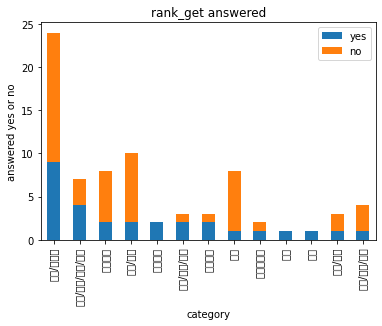

In [26]:
ax = result1.plot.bar(x='category',stacked=True)
ax.set_ylabel('answered yes or no')
ax.set_title('rank_get answered')

Text(0, 0.5, 'Votes')

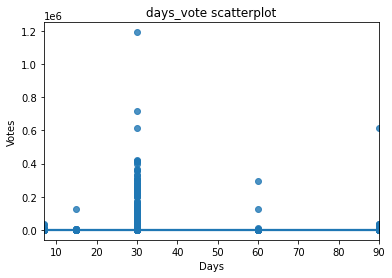

In [ ]:
#청원 기간별 투표수 산점도
df['period']=df['end']-df['start']
df['days']=df['period'].dt.days  
ax= sns.regplot(x='days',y='votes',data=df)
ax.set_title('days_vote scatterplot')
ax.set_xlabel('Days')
ax.set_ylabel('Votes')